In [1]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pylab as plt
#from transformers.models.whisper.tokenization_whisper import WhisperTokenizer
from transformers import AutoTokenizer

In [2]:
text = pd.read_csv('data/train.csv')
#tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-large-v2", language="bn", task="transcribe")
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/banglat5")
# tokenizer = AutoTokenizer.from_pretrained('anuragshas/whisper-small-bn')

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565, and set the legacy attribute accordingly.


In [16]:
from bnunicodenormalizer import Normalizer
bnorm = Normalizer()
def normalize(sen):
    _words = [bnorm(word)['normalized']  for word in sen.split()]
    return " ".join([word for word in _words if word is not None])

In [3]:
# calculate the length of speech in seconds
import os
def file_size(i):
    return os.stat('data/train_mp3s/'+text.id.iloc[i]+'.mp3').st_size/1024,len(tokenizer.encode(text.sentence.iloc[i][:-1],add_special_tokens=False))

def cal_len(i):
    return librosa.load('data/train_mp3s/'+text.id.iloc[i]+'.mp3')[0].shape[0]/32000

def cal_len2(i):
    return len(tokenizer.encode(text.sentence.iloc[i][:-1],add_special_tokens=False))

def cal_len3(i):
    return len(tokenizer.encode(normalize(text.sentence.iloc[i][:-1]),add_special_tokens=False))

In [4]:
import multiprocessing
cpus = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=cpus)

In [5]:
sizes = pool.map(file_size, range(text.shape[0]))
sizes, lens = zip(*sizes)

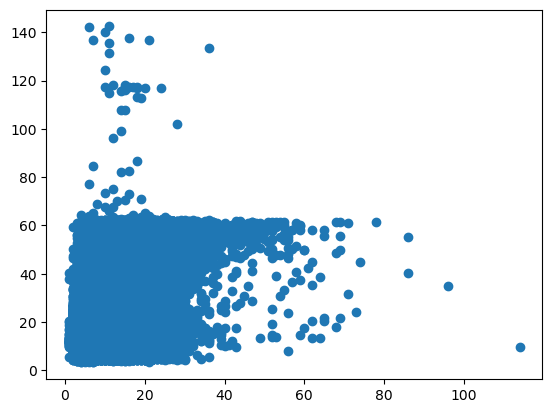

In [8]:
import matplotlib.pyplot as plt
plt.scatter(lens,sizes)

In [7]:
def last(i):
    if len(text.sentence.iloc[i])>0:
        return text.sentence.iloc[i][-1]
    else:
        return ""
unique_last = pool.map(last, range(text.shape[0]))

In [8]:
set(unique_last)

{'!',
 '"',
 "'",
 ',',
 '-',
 '.',
 ':',
 ';',
 '?',
 '।',
 '॥',
 'ং',
 'ঃ',
 'ই',
 'উ',
 'ও',
 'ক',
 'খ',
 'গ',
 'চ',
 'জ',
 'ট',
 'ড',
 'ণ',
 'ত',
 'থ',
 'দ',
 'ধ',
 'ন',
 'প',
 'ফ',
 'ব',
 'ভ',
 'ম',
 'য',
 'র',
 'ল',
 'শ',
 'ষ',
 'স',
 'হ',
 '়',
 'া',
 'ি',
 'ী',
 'ু',
 'ে',
 'ো',
 '্',
 'য়',
 '৷',
 '—',
 '’',
 '…'}

In [5]:
speech_len = pool.map(cal_len, range(text.shape[0]))

(array([2.77634e+05, 3.83748e+05, 2.18395e+05, 7.63900e+04, 7.43000e+03,
        7.00000e+00, 3.00000e+00, 5.00000e+00, 1.50000e+01, 9.00000e+00]),
 array([ 0.37209375,  2.00930625,  3.64651875,  5.28373125,  6.92094375,
         8.55815625, 10.19536875, 11.83258125, 13.46979375, 15.10700625,
        16.74421875]),
 <BarContainer object of 10 artists>)

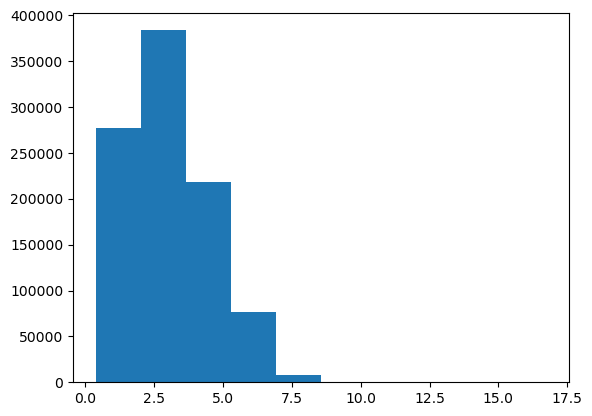

In [8]:
# audio distribution in seconds
plt.hist(speech_len)

In [9]:
speech_len = pool.map(cal_len2, range(text.shape[0]))

In [11]:
import numpy as np
a = np.array(speech_len)
(a<24).sum()/a.shape[0]

0.9933782050483793

(array([3.70000e+01, 1.29900e+03, 9.28480e+04, 7.15700e+04, 7.62860e+04,
        1.47384e+05, 6.52440e+04, 1.28823e+05, 7.82940e+04, 7.21140e+04,
        1.07202e+05, 3.52930e+04, 4.41120e+04, 1.27660e+04, 9.44500e+03,
        1.14270e+04, 3.11100e+03, 3.40200e+03, 8.43000e+02, 9.42000e+02]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ,
        15.4, 16.8, 18.2, 19.6, 21. , 22.4, 23.8, 25.2, 26.6, 28. ]),
 <BarContainer object of 20 artists>)

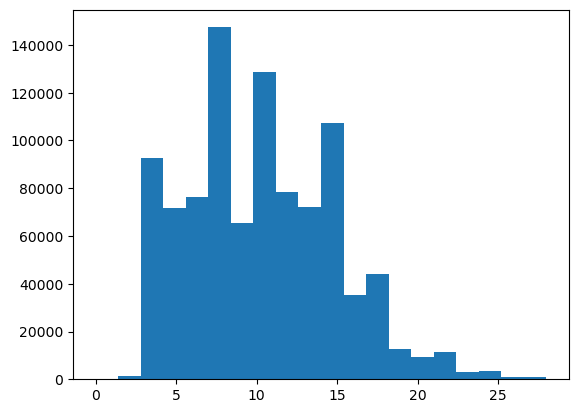

In [13]:
# text distribution in number of token
plt.hist(speech_len,bins=20,range=(0,28))

With normalizer

In [19]:
speech_len = pool.map(cal_len3, range(text.shape[0]))

In [20]:
print(max(speech_len))

112


(array([6.72644e+05, 2.85502e+05, 5.15200e+03, 2.26000e+02, 7.70000e+01,
        2.20000e+01, 9.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  1. ,  12.1,  23.2,  34.3,  45.4,  56.5,  67.6,  78.7,  89.8,
        100.9, 112. ]),
 <BarContainer object of 10 artists>)

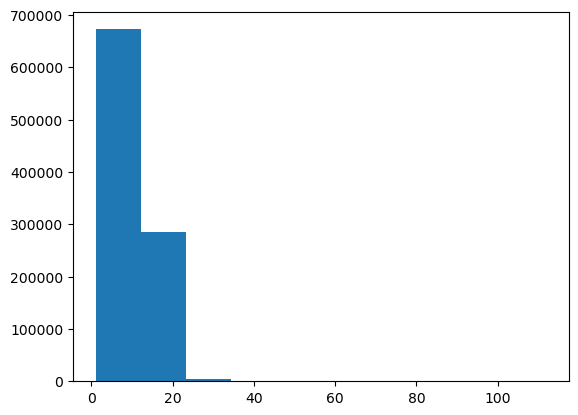

In [21]:
# text distribution in number of token
plt.hist(speech_len)

'anuragshas/whisper-small-bn'

In [5]:
speech_len = pool.map(cal_len2, range(text.shape[0]))

In [6]:
print(max(speech_len))

458


(array([1.39690e+05, 3.01470e+05, 2.63125e+05, 1.99975e+05, 4.57010e+04,
        1.14110e+04, 2.08300e+03, 1.61000e+02, 1.30000e+01, 7.00000e+00]),
 array([  2. ,  47.6,  93.2, 138.8, 184.4, 230. , 275.6, 321.2, 366.8,
        412.4, 458. ]),
 <BarContainer object of 10 artists>)

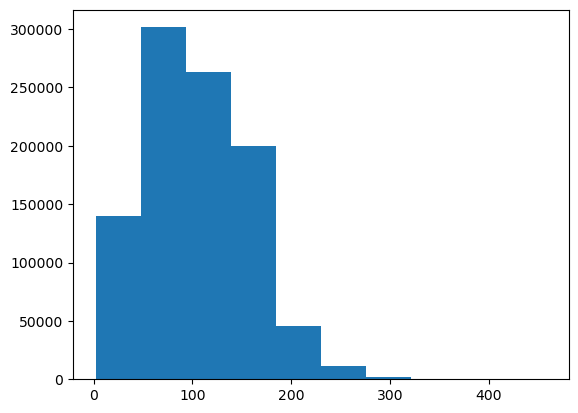

In [7]:
# text distribution in number of token
plt.hist(speech_len)

In [ ]:
# from indicnlp.normalize.indic_normalize import IndicNormalizerFactory
# import string
# import re

# def normalize_bn(sentence):
#     '''
#     Perform NFC -> NFD normalization for a sentence and a given language
#     sentence: string
#     lang_code: language code in ISO format
#     '''
#     factory = IndicNormalizerFactory()
#     normalizer=factory.get_normalizer('bn')
#     normalized_sentence = normalizer.normalize(sentence)
#     return normalized_sentence


# def normalize_sentence(sentence, mode=['punct','lang-bn']):
#     if 'punct' in mode:
#         sentence = sentence.translate(str.maketrans('', '', string.punctuation + "।۔'-॥"))
#     if 'lang-bn' in mode:
#         sentence = normalize_bn(sentence)
#     sentence = re.sub(' +', ' ', sentence)  # trim space
#     if 'non-empty' in mode:
#         if sentence == '': sentence='<empty>'
#     return sentence